In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

In [44]:
#Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Reading Dataset and displaying first 5 rows
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
df.drop(['id'], axis=1, inplace=True)

In [47]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
from sklearn.preprocessing import OneHotEncoder
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_data = df[categorical_variables]
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
df = pd.concat([df.drop(columns=categorical_variables), encoded_dataframe], axis=1)
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [50]:
df.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [51]:
#Advanced Strategy
X = df.drop('stroke', axis=1)
y = df['stroke']

imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

In [52]:
df = pd.concat([X_imputed, y], axis = 1)

In [53]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64

In [54]:
# Label selection
y = df['stroke']
x = df.drop('stroke',axis=1)

In [55]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

In [56]:
pip install imbalanced-learn

In [57]:
smote = SMOTE(random_state=42)

In [58]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [59]:
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)  # Assuming you have column names in X
y_resampled_df = pd.DataFrame(y_resampled, columns=['stroke'])

In [61]:
balanced_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [62]:
balanced_df.to_excel('balanced_dataset.xlsx', index=False)

In [37]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
df.skew().sort_values(ascending=False)

gender_Other                      71.484264
work_type_Never_worked            15.146344
stroke                             4.193284
heart_disease                      3.947244
hypertension                       2.715392
work_type_Govt_job                 2.219958
work_type_children                 2.143866
smoking_status_smokes              1.913452
work_type_Self-employed            1.852619
smoking_status_formerly smoked     1.727782
avg_glucose_level                  1.572284
bmi                                1.088187
smoking_status_Unknown             0.861974
ever_married_No                    0.657745
smoking_status_never smoked        0.537548
gender_Male                        0.349749
Residence_type_Rural               0.032107
Residence_type_Urban              -0.032107
age                               -0.137059
work_type_Private                 -0.292800
gender_Female                     -0.348930
ever_married_Yes                  -0.657745
dtype: float64

In [39]:
# Normalising using standard scalar
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

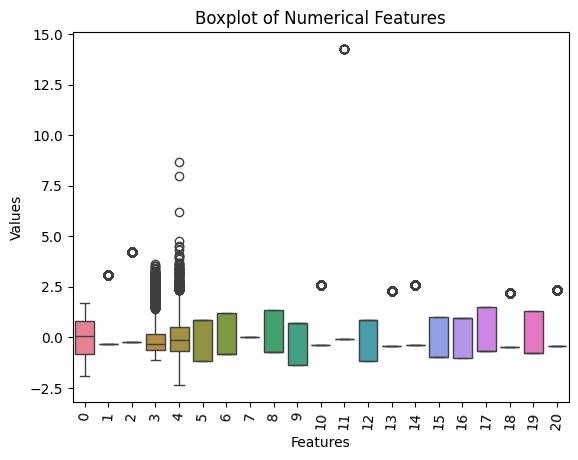

In [40]:
sns.boxplot(data=scaled_x_train)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

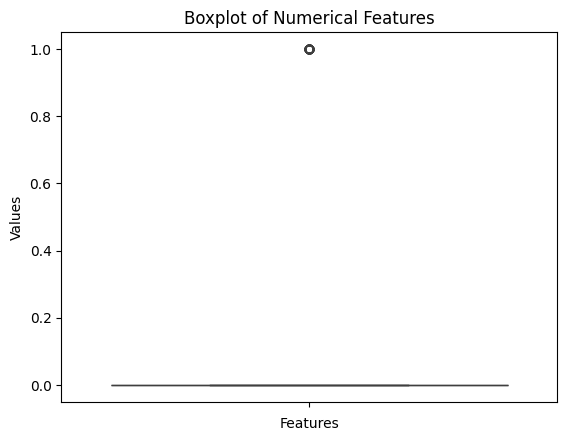

In [41]:
sns.boxplot(data=y_test)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

In [42]:
pca = PCA ()
pca.fit(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.arange(1, len(explained_variance_ratio) + 1)
index_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1

plt.figure(figsize=(8, 6))
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axvline(x=index_80_percent, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components)
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pca = PCA(n_components=10)
reduced_x_train = pca.fit_transform(scaled_x_train)
reduced_x_test = pca.transform(scaled_x_test)

In [ ]:
svc = SVC(kernel='linear')
svc.fit(reduced_x_train, y_train)
predicted_output = svc.predict(reduced_x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

In [ ]:
metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)

In [ ]:
# Determining measure of accuracy using confusion matrix (given this is a classification problem)
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

In [ ]:
tp = 25
tn = 29
total_observation = 61
acc = (tp + tn) / total_observation
print("Accuracy:",acc*100,"%")

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted_output, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Age, BMI, and Average Glucose Level')
plt.show()